In [1]:
from access.utils.paths import get_dataset_dir, get_data_filepath, DATA_DIR
from access.utils.utils import read_lines
from access.utils.calc import sentence_fkf, sentence_fkgl, get_corpus_vocab_size, get_corpus_vocab_size_fr, get_avg_token_per_sentence, get_avg_token_per_sentence_fr
from sacrebleu import corpus_bleu, sentence_bleu
from tseval.feature_extraction import get_compression_ratio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks")

In [3]:
with open(get_dataset_dir('wikilarge') / 'wikilarge.train.src', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()

with open(get_dataset_dir('wikilarge') / 'wikilarge.train.dst', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [4]:
print("number of different words in complex set:", get_corpus_vocab_size(src))
print("number of different words in simple set:", get_corpus_vocab_size(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence(dst))
print("num of total samples:", len(src))

number of different words in complex set: 163949
number of different words in simple set: 135607
avg words per sentence in complex set: 21.92503424403344
avg words per sentence in simple set: 16.14739104324532
num of total samples: 296402


In [5]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

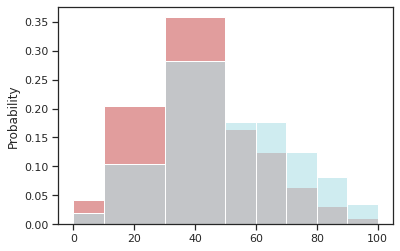

In [6]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.6)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

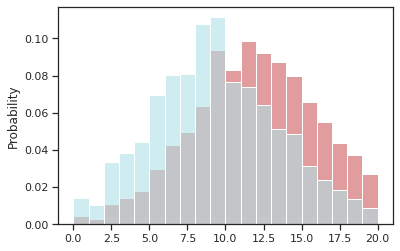

In [7]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.6)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

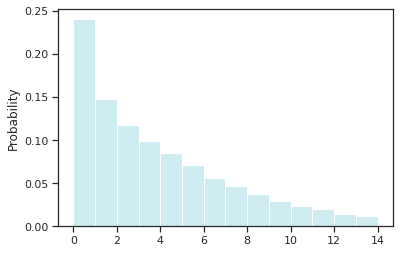

In [8]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.6)

<AxesSubplot:ylabel='Probability'>

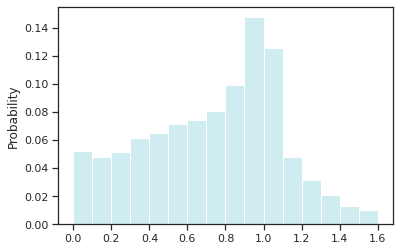

In [9]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.6)

In [10]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

42.380879476306724
50.629688103859536
22.76016704810011
12.603129986086813
9.859608827731721
4.549991779082182
0.8723893327039303


In [11]:
with open(get_dataset_dir('turkcorpus') / 'turkcorpus.valid.complex', 'r', encoding="utf-8") as f_complex:
    src = f_complex.readlines()

ref_filepaths = [get_data_filepath('turkcorpus', 'valid', 'simple.turk', i) for i in range(8)]
refs_sents=[read_lines(ref_filepath) for ref_filepath in ref_filepaths]

In [12]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for ref in refs_sents:
    for s, d in zip(src, ref):
        s = s.strip()
        d = d.strip()
        try:
            fkf_s = sentence_fkf(s)
            fkf_d = sentence_fkf(d)
            fkgl_s = sentence_fkgl(s)
            fkgl_d = sentence_fkgl(d)
            delta_fkf = abs(fkf_s - fkf_d)
            delta_fkgl = abs(fkgl_s - fkgl_d)
            fkf_ss.append(fkf_s)
            fkf_ds.append(fkf_d)
            delta_fkfs.append(delta_fkf)

            fkgl_ss.append(fkgl_s)
            fkgl_ds.append(fkgl_d)
            delta_fkgls.append(delta_fkgl)

            compression_ratio = get_compression_ratio(s, d)
            ratios.append(compression_ratio)
            
            bleu = corpus_bleu(s, d, force=True, lowercase=True).score
            bleus.append(bleu)
        except:
            continue

<AxesSubplot:ylabel='Probability'>

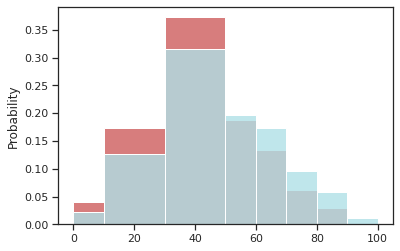

In [13]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

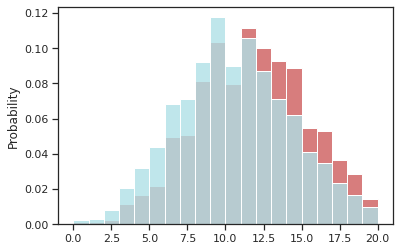

In [14]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

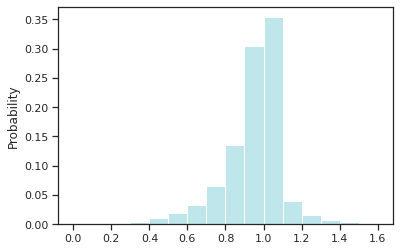

In [15]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

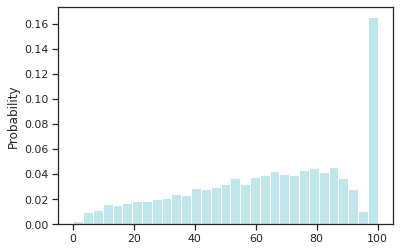

In [16]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

In [17]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))
print(np.mean(bleu))

43.60890398798082
50.02363906947526
9.02836629891031
11.944774937255636
10.751969366510105
1.5741625849514713
0.947053480805469
25.89451141492935


In [18]:
with open(get_dataset_dir('para') / 'para.train.src', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()

with open(get_dataset_dir('para') / 'para.train.dst', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [19]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

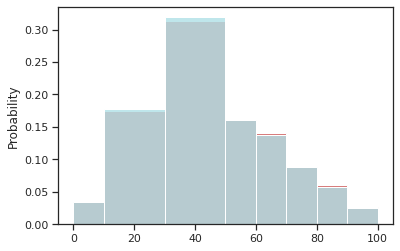

In [20]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

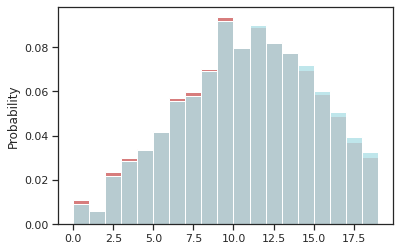

In [21]:
sns.histplot(fkgl_ss, stat="probability", bins=range(20), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(20), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

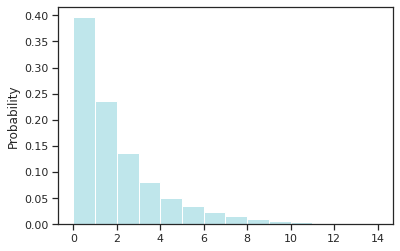

In [22]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

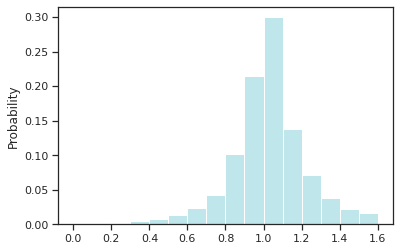

In [23]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

In [24]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

48.216395797107396
47.66504088419591
12.633193642724507
11.154942326917332
11.415694512066494
2.120047665278314
1.1177903371227802


In [25]:
with open(DATA_DIR / 'complex_trans.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [26]:
print("number of different words in complex set:", get_corpus_vocab_size(src))
print("number of different words in simple set:", get_corpus_vocab_size(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence(dst))
print("num of total samples:", len(src))

number of different words in complex set: 196301
number of different words in simple set: 165130
avg words per sentence in complex set: 18.95276928845744
avg words per sentence in simple set: 19.36424861958341
num of total samples: 816058


In [27]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf(s)
        fkf_d = sentence_fkf(d)
        fkgl_s = sentence_fkgl(s)
        fkgl_d = sentence_fkgl(d)
        delta_fkf = abs(fkf_s - fkf_d)
        delta_fkgl = abs(fkgl_s - fkgl_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        fkgl_ss.append(fkgl_s)
        fkgl_ds.append(fkgl_d)
        delta_fkgls.append(delta_fkgl)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
        
        bleu = corpus_bleu(s, d, force=True, lowercase=True).score
        bleus.append(bleu)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

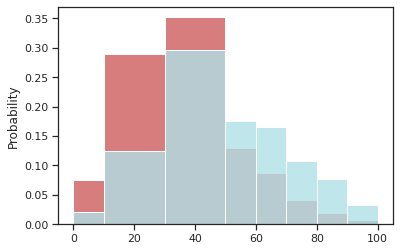

In [28]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

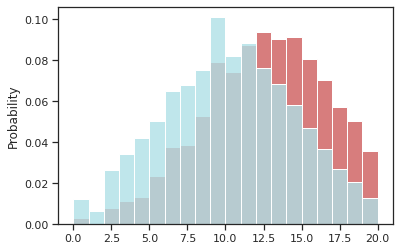

In [29]:
sns.histplot(fkgl_ss, stat="probability", bins=range(21), color="indianred", alpha=0.8)
sns.histplot(fkgl_ds, stat="probability", bins=range(21), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

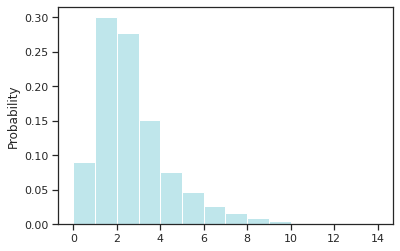

In [30]:
sns.histplot(delta_fkgls, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

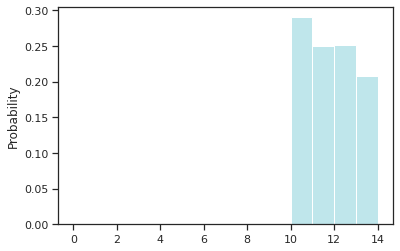

In [31]:
sns.histplot(delta_fkfs, stat="probability", bins=range(15), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

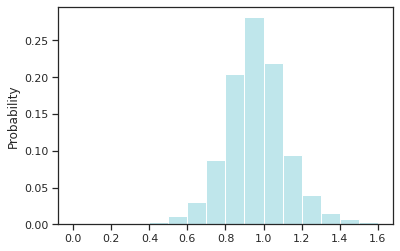

In [32]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

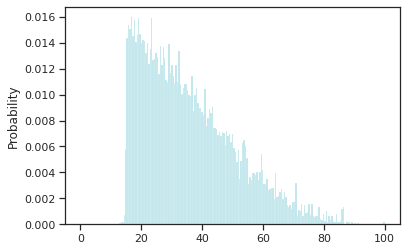

In [33]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

<AxesSubplot:>

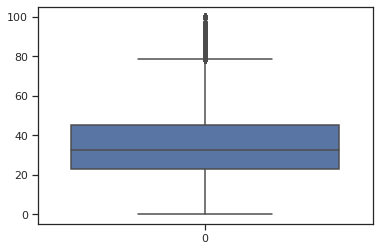

In [34]:
sns.boxplot(data=bleus)

In [35]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(fkgl_ss))
print(np.mean(fkgl_ds))
print(np.mean(delta_fkgls))
print(np.mean(ratios))

34.5962485471986
53.31987532964889
18.723626782450282
13.107387270003144
10.341081883024257
2.7822333186956234
0.9629878586401137


In [36]:
import pickle
f = open("./data/ppls.pickle", "rb")
ppls = pickle.load(f)
f.close()

In [37]:
ppls = pd.DataFrame(ppls)
ppls.rename(columns={'0':'ppl'})
ppls = ppls.sample(frac=0.001)
len(ppls)

3969

In [38]:
np.mean(ppls)

0    109.130294
dtype: float64

<AxesSubplot:ylabel='Count'>

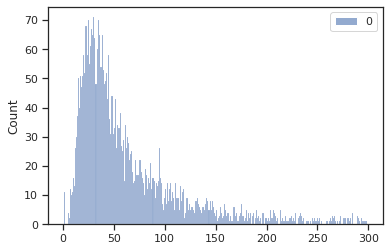

In [39]:
sns.histplot(data=ppls, bins=range(0,300), color="powderblue", alpha=0.6)

In [40]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_de
from tqdm import tqdm
import linecache

para_data = DATA_DIR / 'de-en_trans_result'/ 'generate-test.txt'
en_row = DATA_DIR / 'wmt_en_de' / 'train.en'
de_row = DATA_DIR / 'wmt_en_de' / 'train.de'

lenfile = sum([1 for i in open(para_data, "r")])

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        if line.startswith('S'):
            no = int(line.strip().split('\t')[0][2:])
            pair_generated = {}
            row_line_de = linecache.getline(str(de_row), no+1).strip()
            pair_generated['ss'] = row_line_de
        elif line.startswith('T'):
            no = int(line.strip().split('\t')[0][2:])
            row_line_en = linecache.getline(str(en_row), no+1).strip()
            pair_generated['ts'] = row_line_en
        elif line.startswith('H'):
            pass
        elif line.startswith("D"):
            pair_generated['ds'] = line.strip().split('\t')[-1]
        elif line.startswith("P"):
            try:
                ts_fkf = sentence_fkf(pair_generated['ts'])
                ds_fkf = sentence_fkf(pair_generated['ds'])
                ss_fkf = sentence_fkf_de(pair_generated['ss'])
                delta_fkfs.append(ts_fkf-ds_fkf)
                multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
                model_delta_fkfs.append(ss_fkf-ds_fkf)
            except:
                pass
        else:
            pass

100%|██████████| 17753928/17753928 [27:21<00:00, 10816.42it/s]


In [41]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})
# d_fkfs = d_fkfs.sample(frac=0.001, axis=0)

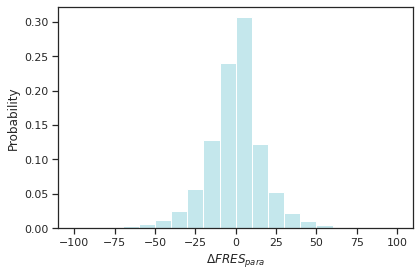

In [42]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf.png', dpi=400)

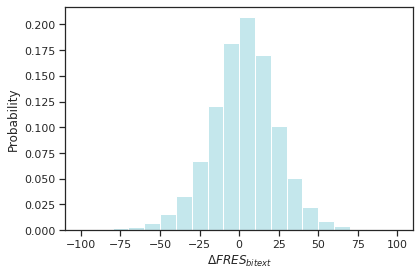

In [43]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{bitext}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/bilingual_delta_fkf.png', dpi=400)

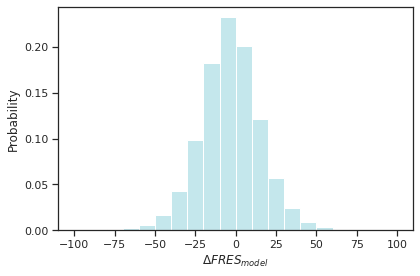

In [44]:
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{model}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/model_delta_fkf.png', dpi=400)

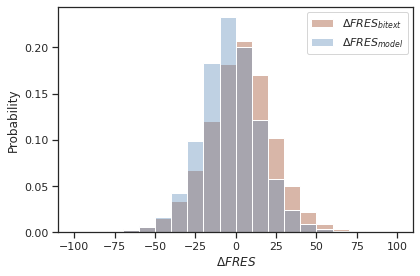

In [45]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FRES$')
sns_plot.legend(["$\Delta FRES_{bitext}$","$\Delta FRES_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta.png', dpi=400)

In [46]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_fr
from tqdm import tqdm
import linecache

para_data = DATA_DIR / 'en-fr_trans_result'/ 'generate-test.txt'
en_row = DATA_DIR / 'europarl_en_fr' / 'europarl-v7.fr-en.en'
fr_row = DATA_DIR / 'europarl_en_fr' / 'europarl-v7.fr-en.fr'

lenfile = sum([1 for i in open(para_data, "r")])

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        if line.startswith('S'):
            no = int(line.strip().split('\t')[0][2:])
            pair_generated = {}
            row_line_en = linecache.getline(str(en_row), no+1).strip()
            pair_generated['ss'] = row_line_en
        elif line.startswith('T'):
            no = int(line.strip().split('\t')[0][2:])
            row_line_fr = linecache.getline(str(fr_row), no+1).strip()
            pair_generated['ts'] = row_line_fr
        elif line.startswith('H'):
            pass
        elif line.startswith("D"):
            pair_generated['ds'] = line.strip().split('\t')[-1]
        elif line.startswith("P"):
            try:
                ts_fkf = sentence_fkf_fr(pair_generated['ts'])
                ds_fkf = sentence_fkf_fr(pair_generated['ds'])
                ss_fkf = sentence_fkf(pair_generated['ss'])
                delta_fkfs.append(ts_fkf-ds_fkf)
                multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
                model_delta_fkfs.append(ss_fkf-ds_fkf)
            except:
                pass
        else:
            pass

100%|██████████| 10038612/10038612 [17:49<00:00, 9382.66it/s]


In [47]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})
# d_fkfs = d_fkfs.sample(frac=0.001, axis=0)

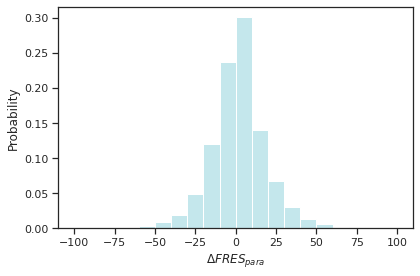

In [48]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf_fr.png', dpi=400)

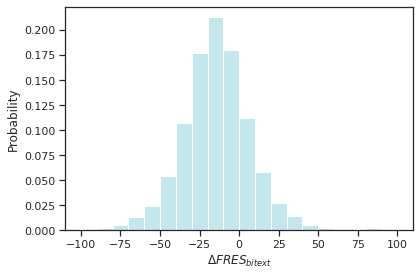

In [49]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{bitext}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/bilingual_delta_fkf_fr.png', dpi=400)

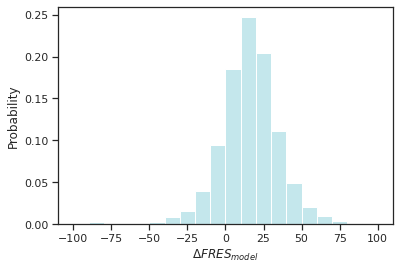

In [50]:
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{model}$')
sns_plot = sns_plot.get_figure()
sns_plot.savefig('./plots/model_delta_fkf_fr.png', dpi=400)

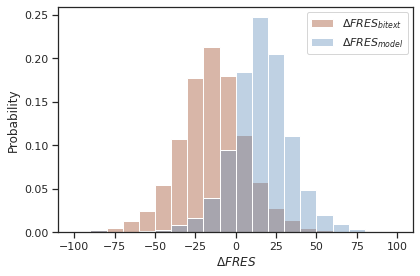

In [51]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FRES$')
sns_plot.legend(["$\Delta FRES_{bitext}$","$\Delta FRES_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta_fr.png', dpi=400)

In [2]:
with open(DATA_DIR / 'complex_trans_fr.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans_fr.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [3]:
print("number of different words in complex set:", get_corpus_vocab_size_fr(src))
print("number of different words in simple set:", get_corpus_vocab_size_fr(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence_fr(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence_fr(dst))
print("num of total samples:", len(src))

number of different words in complex set: 112335
number of different words in simple set: 102672
avg words per sentence in complex set: 26.171425723184182
avg words per sentence in simple set: 26.749508390721246
num of total samples: 621937


In [54]:
from access.utils.paths import DATA_DIR
from access.utils.calc import sentence_fkf_es, get_corpus_vocab_size_es, get_avg_token_per_sentence_es
from tqdm import tqdm

para_data = DATA_DIR / 'en-es_trans_result'/ 'generate-test.txt'

delta_fkfs = []
multilingual_delta_fkfs = []
model_delta_fkfs = []
            
lenfile = sum([1 for i in open(para_data, "r")])

with open(para_data, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=lenfile):
        cells = line.strip().split('\t')
        try:
            ds = cells[0]
            ts = cells[1]
            ss = cells[2]
            ts_fkf = sentence_fkf_es(ts.strip())
            ss_fkf = sentence_fkf(ss.strip())
            ds_fkf = sentence_fkf_es(ds.strip())
            delta_fkfs.append(ts_fkf-ds_fkf)
            multilingual_delta_fkfs.append(ts_fkf-ss_fkf)
            model_delta_fkfs.append(ss_fkf-ds_fkf)
        except:
            continue

100%|██████████| 1964224/1964224 [15:42<00:00, 2083.65it/s]


In [55]:
d_fkfs = pd.DataFrame({'translation_delta_fkf':delta_fkfs, 'bilingual_delta_fkf':multilingual_delta_fkfs, 'model_delta_fkf':model_delta_fkfs})

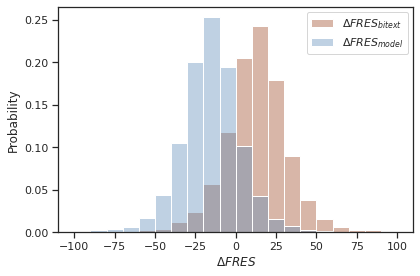

In [56]:
sns_plot = sns.histplot(d_fkfs["bilingual_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#9F4926", stat="probability", alpha=0.4)
sns_plot = sns.histplot(d_fkfs["model_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], color="#5F8CB9", stat="probability", alpha=0.4)
sns_plot.set_xlabel('$\Delta FRES$')
sns_plot.legend(["$\Delta FRES_{bitext}$","$\Delta FRES_{model}$"])
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/biligual&model_delta_es.png', dpi=400)

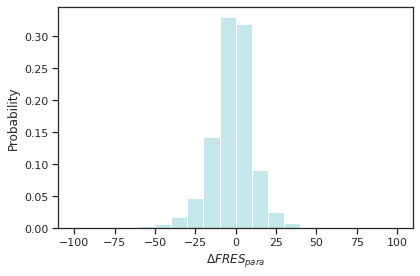

In [57]:
sns_plot = sns.histplot(d_fkfs["translation_delta_fkf"], bins=[-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], stat="probability", color="powderblue")
sns_plot.set_xlabel('$\Delta FRES_{para}$')
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/translation_delta_fkf_es.png', dpi=400)

In [58]:
with open(DATA_DIR / 'complex_trans_es.csv', 'r', encoding="utf-8") as f_src:
    src = f_src.readlines()
    
with open(DATA_DIR / 'simple_trans_es.csv', 'r', encoding="utf-8") as f_dst:
    dst = f_dst.readlines()

In [59]:
print("number of different words in complex set:", get_corpus_vocab_size_es(src))
print("number of different words in simple set:", get_corpus_vocab_size_es(dst))
print("avg words per sentence in complex set:", get_avg_token_per_sentence_es(src))
print("avg words per sentence in simple set:", get_avg_token_per_sentence_es(dst))
print("num of total samples:", len(src))

number of different words in complex set: 119876
number of different words in simple set: 104361
avg words per sentence in complex set: 27.997448048833483
avg words per sentence in simple set: 25.79146561937597
num of total samples: 487862


In [60]:
fkf_ss = []
fkf_ds = []
delta_fkfs = []
fkgl_ss = []
fkgl_ds = []
delta_fkgls = []
ratios = []
bleus = []
for s, d in zip(src, dst):
    s = s.strip()
    d = d.strip()
    try:
        fkf_s = sentence_fkf_fr(s)
        fkf_d = sentence_fkf_fr(d)
        delta_fkf = abs(fkf_s - fkf_d)
        fkf_ss.append(fkf_s)
        fkf_ds.append(fkf_d)
        delta_fkfs.append(delta_fkf)
        
        compression_ratio = get_compression_ratio(s, d)
        ratios.append(compression_ratio)
        
        bleu = corpus_bleu(s, d, force=True, lowercase=True).score
        bleus.append(bleu)
    except:
        continue

<AxesSubplot:ylabel='Probability'>

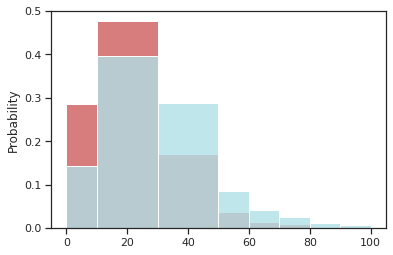

In [61]:
sns.histplot(fkf_ss, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="indianred", alpha=0.8)
sns.histplot(fkf_ds, stat="probability", bins=[0,10,30,50,60,70,80,90,100], color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

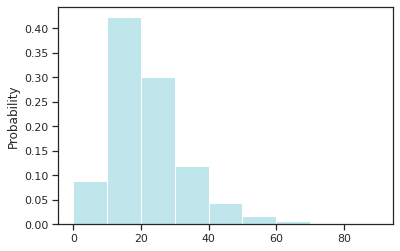

In [62]:
sns.histplot(delta_fkfs, stat="probability", bins=range(0,100,10), color="powderblue", alpha=0.8)

<AxesSubplot:ylabel='Probability'>

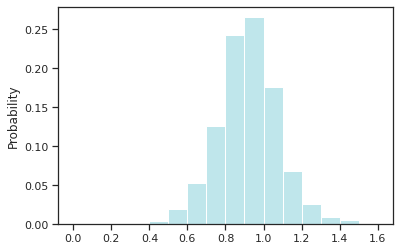

In [63]:
sns.histplot(data=ratios, stat="probability", color="powderblue", bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], alpha=0.8)

<AxesSubplot:ylabel='Probability'>

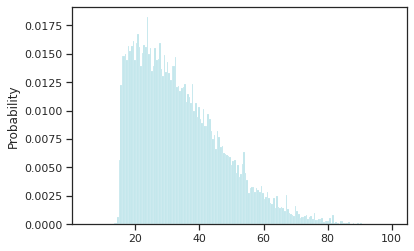

In [64]:
sns.histplot(bleus, stat="probability", color="powderblue", alpha=0.8)

In [65]:
print(np.mean(fkf_ss))
print(np.mean(fkf_ds))
print(np.mean(delta_fkfs))
print(np.mean(ratios))

3.087288488157287
25.082449389212105
22.102772068308536
0.9212921607007498


In [17]:
num_ablations_valid = pd.DataFrame({
    '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*2+['1K', '10K', '100K', '300K']*2,
    'SARI': [32.61, 40.65, 41.23, 41.63, 41.82, 41.91, 41.93, 29.29, 40.85, 42.67, 43.53, 43.36, 43.63, 43.59, 33.24, 37.03, 38.69, 39.26, 30.26, 36.25, 37.7, 38.68],
    'Corpus': ['mined_TURK']*7+['mined_ASSET']*7+['wikilarge_TURK']*4+['wikilarge_ASSET']*4
})

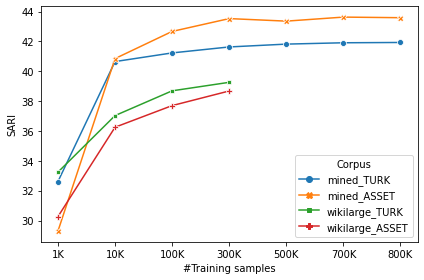

In [18]:
sns_plot = sns.lineplot(data=num_ablations_valid, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/BART_num_ablations_valid.png', dpi=400)

In [19]:
num_ablations_test = pd.DataFrame({
    '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*2+['1K', '10K', '100K', '300K']*2,
    'SARI': [32.05, 40.9, 41.56, 42.16, 41.99, 41.97, 41.97, 27.23, 39.37, 41.79, 42.68, 42.6, 43.01, 42.69, 34.53, 37.33, 38.03, 38.96, 31.84, 35.42, 35.33, 36.81], 
    'Corpus': ['mined_TURK']*7+['mined_ASSET']*7+['wikilarge_TURK']*4+['wikilarge_ASSET']*4
})

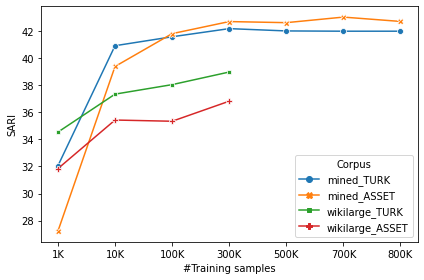

In [20]:
sns_plot = sns.lineplot(data=num_ablations_test, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/BART_num_ablations_test.png', dpi=400)

In [23]:
num_ablations_valid = pd.DataFrame({
    '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*2+['1K', '10K', '100K', '300K']*2,
    'SARI': [19.53, 27.98, 37.53, 38.96, 39.36, 39.78, 39.75, 24.91, 31.97, 37.43, 38.95, 39.6, 40.11, 40.27, 19.75, 26.72, , 36.67, 25.45, 31.65, , 35.48],
    'Corpus': ['Ours_TURK']*7+['Ours_ASSET']*7
})

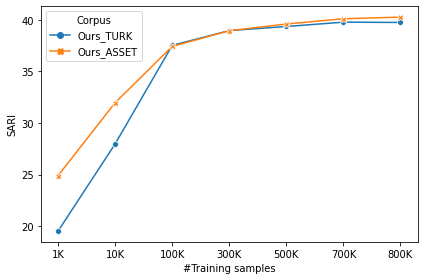

In [24]:
sns_plot = sns.lineplot(data=num_ablations_valid, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/transformer_num_ablations_valid.png', dpi=400)

In [47]:
num_ablations_valid = pd.DataFrame({
    '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*2+['1K', '10K', '100K', '300K']*2,
    'SARI': [19.53, 27.98, 37.53, 38.96, 39.36, 39.78, 39.75, 19.53, 28.72, 37.51, 38.83, 39.53, 40.27, 39.99, 19.75, 26.72, 36.22, 36.67, 20.79, 27.75, 36.67, 37.05],
    'Corpus': ['Ours_valid']*7+['Ours_test']*7+['wikilarge_valid']*4+['wikilarge_test']*4
})

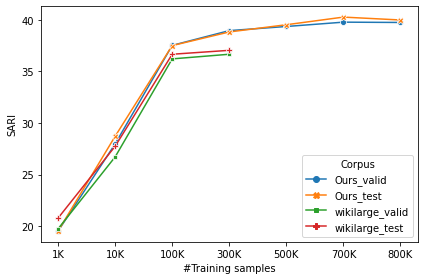

In [48]:
sns_plot = sns.lineplot(data=num_ablations_valid, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/transformer_num_ablations.png', dpi=400)

In [49]:
num_ablations_valid = pd.DataFrame({
    '#Training samples': ['10K', '100K', '300K', '500K', '700K', '800K']*2+['10K', '100K', '300K']*2,
    'SARI': [27.98, 37.53, 38.96, 39.36, 39.78, 39.75, 28.72, 37.51, 38.83, 39.53, 40.27, 39.99, 26.72, 36.22, 36.67, 27.75, 36.67, 37.05],
    'Corpus': ['Ours_valid']*6+['Ours_test']*6+['wikilarge_valid']*3+['wikilarge_test']*3
})

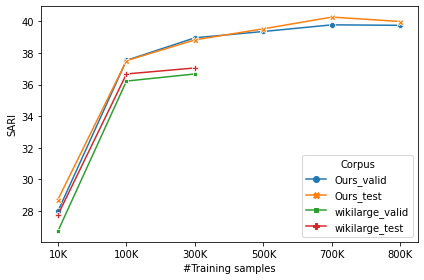

In [50]:
sns_plot = sns.lineplot(data=num_ablations_valid, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/transformer_num_ablations.png', dpi=400)

In [55]:
num_ablations_valid = pd.DataFrame({
    '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*1+['1K', '10K', '100K', '300K']*1,
    'SARI': [19.53, 27.98, 37.53, 38.96, 39.36, 39.78, 39.75, 19.75, 26.72, 36.22, 36.67],
    'Corpus': ['Ours']*7+['Wikilarge']*4
})

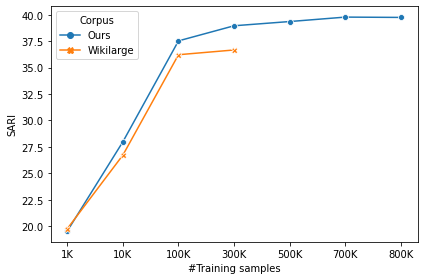

In [56]:
sns_plot = sns.lineplot(data=num_ablations_valid, x="#Training samples", y="SARI", hue="Corpus", style="Corpus", markers=True, dashes=False)
sns_plot = sns_plot.get_figure()
sns_plot.tight_layout()
sns_plot.savefig('./plots/transformer_num_ablations_valid.png', dpi=400)

05/18/2021 18:13:25 - INFO - matplotlib.category -   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
05/18/2021 18:13:25 - INFO - matplotlib.category -   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
05/18/2021 18:13:25 - INFO - matplotlib.category -   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
05/18/2021 18:13:25 - INFO - matplotlib.category -   Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
05/18/2021 18:13:25 - INFO -

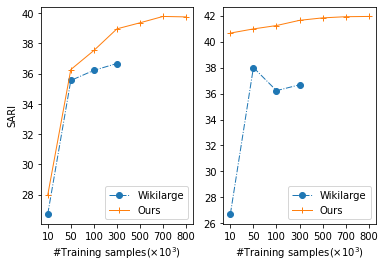

In [34]:
import matplotlib.pyplot as plt
plt_1_x_data = ['10', '50', '100', '300']
plt_1_x_data2 = ['10', '50', '100', '300', '500', '700', '800']
plt_1_y_data = [26.72, 35.55, 36.22, 36.67]
plt_1_y_data2 = [27.98, 36.27, 37.53, 38.96, 39.36, 39.78, 39.75]


plt_2_x_data = ['10', '50', '100', '300']
plt_2_x_data2 = ['10', '50', '100', '300', '500', '700', '800']
plt_2_y_data = [26.72, 38.0, 36.22, 36.67]
plt_2_y_data2 = [40.65, 40.97, 41.23, 41.63, 41.82, 41.91, 41.93]


plt.subplot(121)

plt.plot(plt_1_x_data, plt_1_y_data, linewidth=1.0, linestyle='-.', marker='o', label='Wikilarge')
plt.plot(plt_1_x_data2, plt_1_y_data2, linewidth=1.0, linestyle='-', marker='+', label='Ours')
plt.legend()
plt.xlabel('#Training samples($×10^{3}$)')
plt.ylabel('SARI')

plt.subplot(122)

plt.plot(plt_2_x_data, plt_2_y_data, linewidth=1.0, linestyle='-.', marker='o', label='Wikilarge')
plt.plot(plt_2_x_data2, plt_2_y_data2, linewidth=1.0, linestyle='-', marker='+', label='Ours')
plt.legend()
plt.xlabel('#Training samples($×10^{3}$)')

plt.savefig('./plots/all_num_ablations.png', dpi=1000)

plt.show()

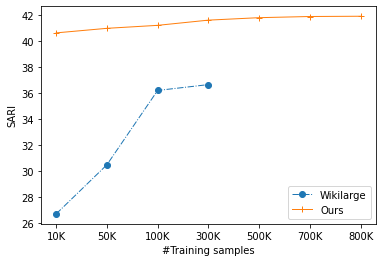

In [13]:
x_data = ['10K', '50K', '100K', '300K']
x_data2 = ['10K', '50K', '100K', '300K', '500K', '700K', '800K']
y_data = [26.72, 30.5, 36.22, 36.67]
y_data2 = [40.65, 41.00, 41.23, 41.63, 41.82, 41.91, 41.93]
#     '#Training samples': ['1K', '10K', '100K', '300K', '500K', '700K', '800K']*2+['1K', '10K', '100K', '300K']*2,
#     'SARI': [32.61, 40.65, 41.23, 41.63, 41.82, 41.91, 41.93, 29.29, 40.85, 42.67, 43.53, 43.36, 43.63, 43.59, 33.24, 37.03, 38.69, 39.26, 30.26, 36.25, 37.7, 38.68],
#     'Corpus': ['mined_TURK']*7+['mined_ASSET']*7+['wikilarge_TURK']*4+['wikilarge_ASSET']*4
# })
plt.plot(x_data, y_data, linewidth=1.0, linestyle='-.', marker='o', label='Wikilarge')
plt.plot(x_data2, y_data2, linewidth=1.0, linestyle='-', marker='+', label='Ours')
plt.legend()
plt.xlabel('#Training samples')
plt.ylabel('SARI')
plt.savefig('./plots/BART_num_ablations.png', dpi=400)
plt.show()